# Analyzing CIA Factbook Data with SQLite and Python

In this project we will take a look at some data from the CIA world factbook. The data from 2015 is availible at github [here](https://github.com/factbook/factbook.sql/releases). 

In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('factbook.db')
cursor = conn.cursor()
q1 = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q1, conn)


type             name         tbl_name  rootpage  \
0  table  sqlite_sequence  sqlite_sequence         3   
1  table            facts            facts        47   

                                                 sql  
0             CREATE TABLE sqlite_sequence(name,seq)  
1  CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY...

In [2]:
q2 = "select * from facts limit 5"
pd.read_sql_query(q2, conn)

id code         name     area  area_land  area_water  population  \
0   1   af  Afghanistan   652230     652230           0    32564342   
1   2   al      Albania    28748      27398        1350     3029278   
2   3   ag      Algeria  2381741    2381741           0    39542166   
3   4   an      Andorra      468        468           0       85580   
4   5   ao       Angola  1246700    1246700           0    19625353   

   population_growth  birth_rate  death_rate  migration_rate  
0               2.32       38.57       13.89            1.51  
1               0.30       12.92        6.58            3.30  
2               1.84       23.67        4.31            0.92  
3               0.12        8.13        6.96            0.00  
4               2.78       38.78       11.49            0.46

In [3]:
q3= '''Select min(population) min_pop, max(population) max_pop,
min(population_growth) min_growth, max(population_growth) max_growth
from facts'''

pd.read_sql_query(q3, conn)

min_pop     max_pop  min_growth  max_growth
0        0  7256490011         0.0        4.02

We see that there are two countries listed that seem to be outliters, one country with a population of 0, and one country with a population of 7.2 billion. Let's see which countries coorespond to these numbers.

In [10]:
q4 = 'select name, min(population) from facts'
pd.read_sql_query(q4, conn)



name  min(population)
0  Antarctica                0

In [11]:
q5 = 'select name, max(population) from facts'
pd.read_sql_query(q5, conn)

name  max(population)
0  World       7256490011

The country with a population of 0 is Antartica. While Antartica has permanant and summer-only staffed research stations, it has no indigenous inhabitants. 

We also see that the entire world population is also an entry as a country. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e46347198>,
      dtype=object)

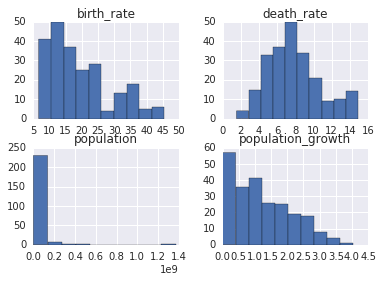

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q6 = '''Select population, population_growth, birth_rate, death_rate
FROM facts
WHERE population != (SELECT max(population) from facts)
AND population != (SELECT min(population) from facts)
'''

test1 = pd.read_sql_query(q6, conn)
test1.hist()